In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci

In [2]:
df = pd.read_csv('clean_automobile_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price-category'],
      dtype='object')

In [4]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-category
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,mpfi,3.21,3.27,9.4,135,6000,16,23,15645,high
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,mpfi,3.31,3.19,9.0,121,4250,21,28,21105,high
138,2,83,subaru,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,3.62,2.36,9.0,69,4900,31,36,5118,low
117,0,161,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,mpfi,3.61,3.21,7.0,142,5600,18,24,18150,high
33,1,101,honda,gas,std,two,hatchback,fwd,front,93.7,...,1bbl,2.91,3.41,9.2,76,6000,30,34,6529,low


In [5]:
df['fuel-type'].value_counts()

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

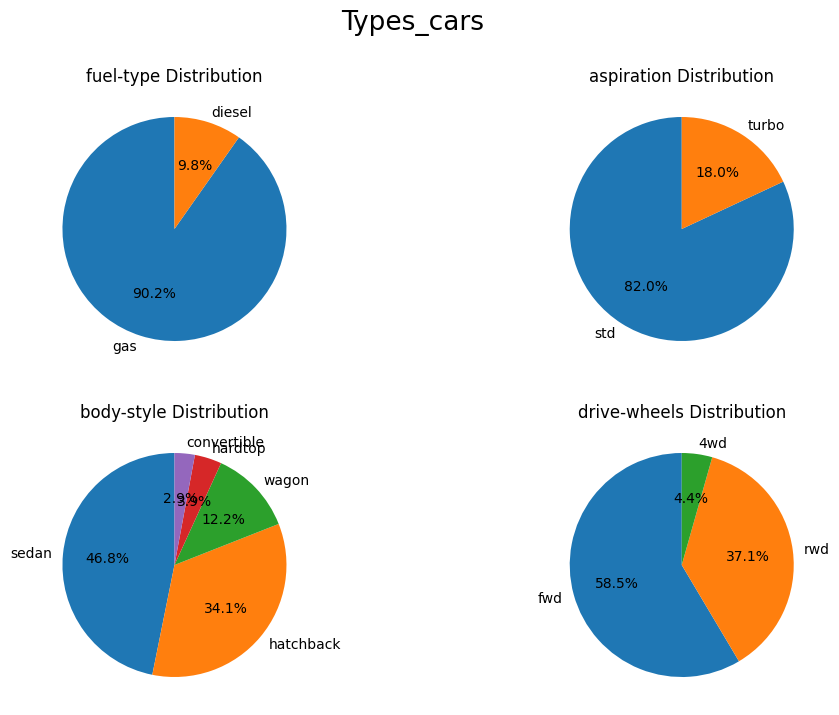

In [6]:
columns_percent = ['fuel-type', 'aspiration', 'body-style', 'drive-wheels']
fig, ax = plt.subplots(2,2, figsize= (12, 8))

for i, columns in enumerate(columns_percent):
    image_plot = df[columns].value_counts()
    row = i // 2
    col = i % 2
    ax[row, col].pie(image_plot, labels=image_plot.index, autopct='%1.1f%%', startangle=90)
    ax[row, col].set_title(f"{columns} Distribution")
plt.suptitle('Types_cars', fontsize= 19)
plt.savefig("charts/cars_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


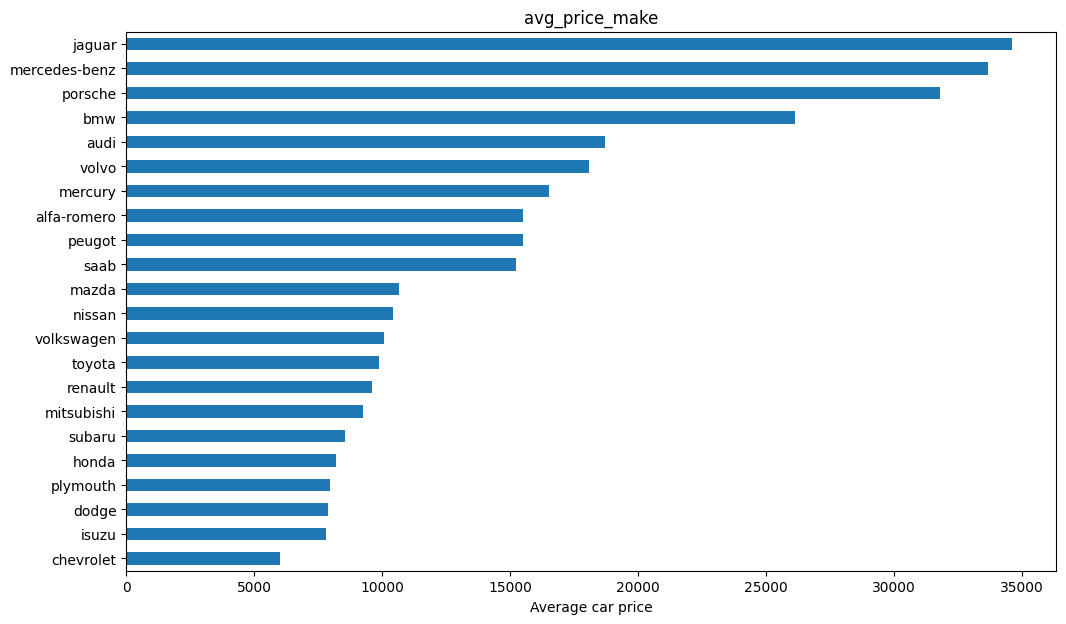

In [7]:
make_price = df.groupby('make')['price'].mean().sort_values(ascending = False)
make_price = make_price.reset_index(name='avg_price')
make_price.plot(kind='barh', x = 'make', y = 'avg_price', title='avg_price_make', figsize=(12,7))
plt.legend().set_visible(False)
plt.xlabel('Average car price')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.savefig('charts/Average_car_price_make.png', dpi = 300,bbox_inches = 'tight')
plt.show()

In [8]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price-category'],
      dtype='object')

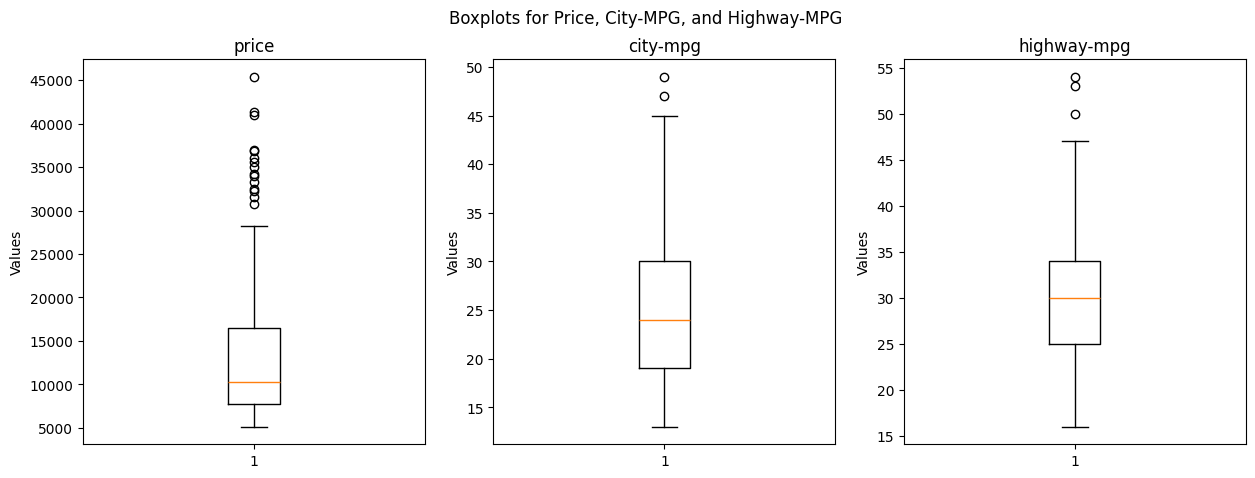

In [9]:
box_columns = ['price', 'city-mpg', 'highway-mpg']

fig, ax = plt.subplots(1, len(box_columns), figsize=(15, 5))

for i, column in enumerate(box_columns):
    ax[i].boxplot(df[column])
    ax[i].set_title(column)  # Title for each subplot
    ax[i].set_ylabel('Values')

fig.suptitle('Boxplots for Price, City-MPG, and Highway-MPG')  # Main title

plt.savefig('charts/box_plots.png', dpi=300, bbox_inches='tight')
plt.show()


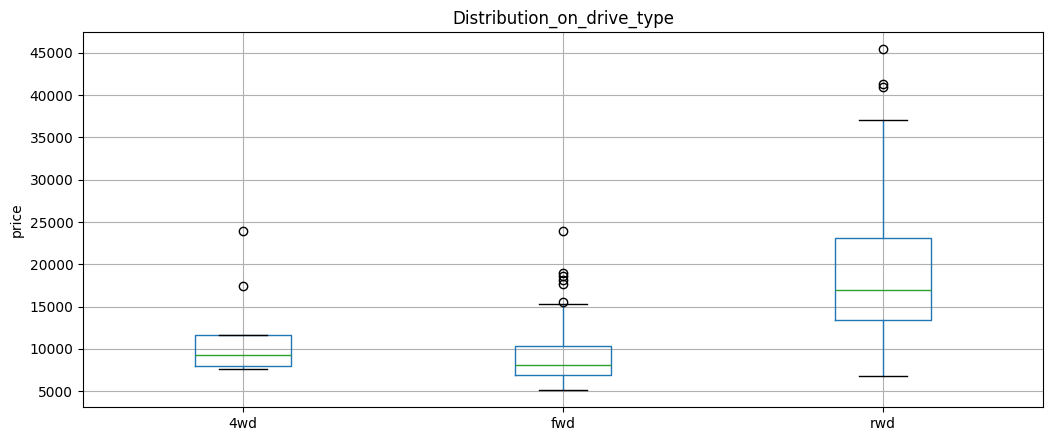

In [10]:
df.boxplot(column='price', by= 'drive-wheels', figsize= (12, 5))
plt.title('Distribution_on_drive_type')
plt.suptitle('')
plt.ylabel('price')
plt.xlabel('')
plt.savefig('charts/Distribution_on_drive_type.png', dpi = 300, bbox_inches = 'tight')
plt.show()

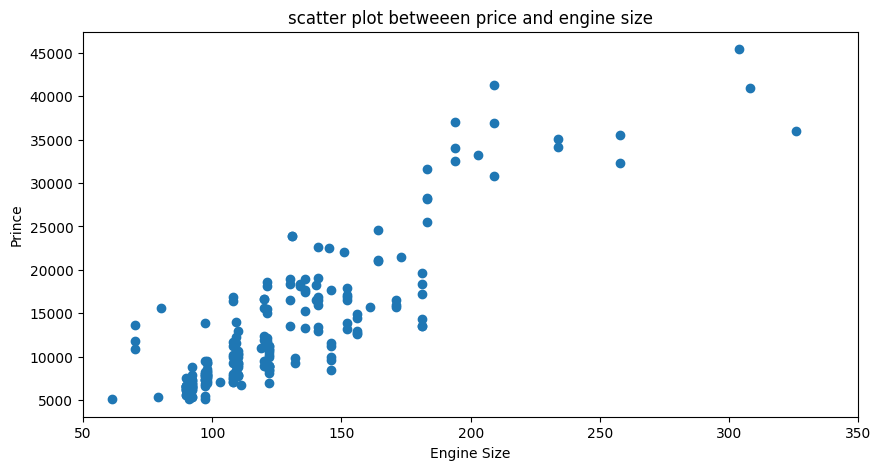

In [11]:
# to see the relation between the two varibles Engine Size on Prce of teh car

plt.figure(figsize=(10, 5))
plt.scatter(x=df['engine-size'], y=df['price'])
plt.title('scatter plot betweeen price and engine size')
plt.xlabel('Engine Size')
plt.xlim(50, 350)
plt.ylabel('Prince')
plt.savefig('charts/engine_size_vs_price.png', dpi = 300, bbox_inches = 'tight')
plt.show() 


In [12]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price-category'],
      dtype='object')

In [13]:
# price relation between drive wheels and body style

df_drive_body = df.groupby(['drive-wheels', 'body-style'], as_index=False)['price'].mean()
df_drive_body

,drive-wheels,body-style,price
0,4wd,hatchback,15739.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9702.333333
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [14]:
# same in pivote format

piv_drive_body = df.pivot_table(index='drive-wheels', columns='body-style', values='price', aggfunc='mean')
piv_drive_body

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,15739.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9702.333333,9997.333333
rwd,23949.6,24202.714286,15334.631579,21711.833333,16994.222222


In [15]:
df.loc[(df['drive-wheels'] == '4wd' ) & (df['body-style'] == 'hardtop'), :]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-category


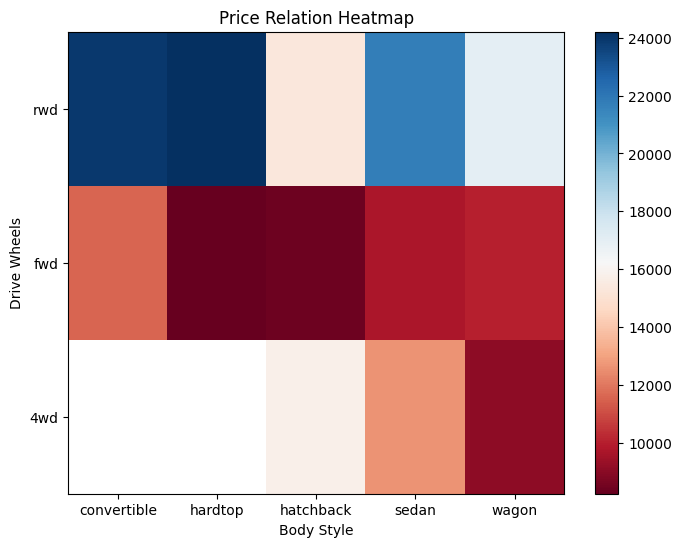

In [16]:
plt.figure(figsize=(8,6))
plt.pcolor(piv_drive_body, cmap='RdBu')
plt.colorbar()

# Add labels
plt.xticks(np.arange(0.5, len(piv_drive_body.columns), 1), piv_drive_body.columns)
plt.yticks(np.arange(0.5, len(piv_drive_body.index), 1), piv_drive_body.index)

plt.xlabel("Body Style")
plt.ylabel("Drive Wheels")
plt.title("Price Relation Heatmap")
plt.savefig('charts/heatmap_drivetype_bodytype.png', dpi = 300, bbox_inches = 'tight')
plt.show()


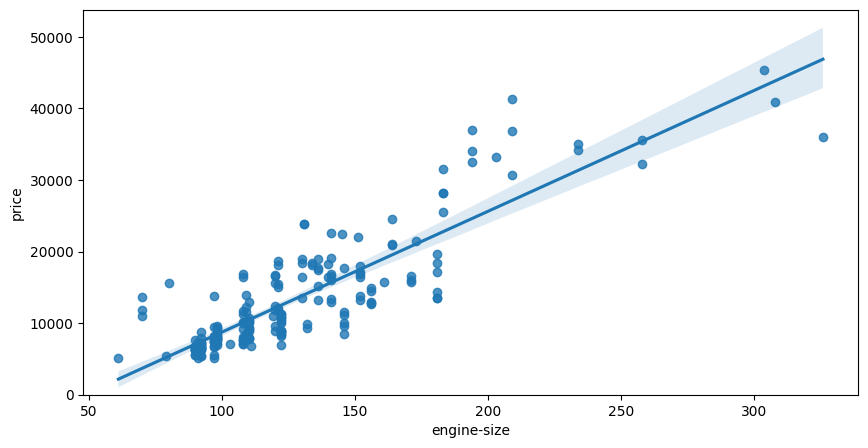

In [17]:
plt.figure(figsize=(10,5))
sns.regplot(x = df['engine-size'], y = df['price'])
plt.ylim(0,)
plt.savefig('charts/correlation_price_enginesize.png', dpi = 300,bbox_inches = 'tight')
plt.show()

In [18]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price-category'],
      dtype='object')

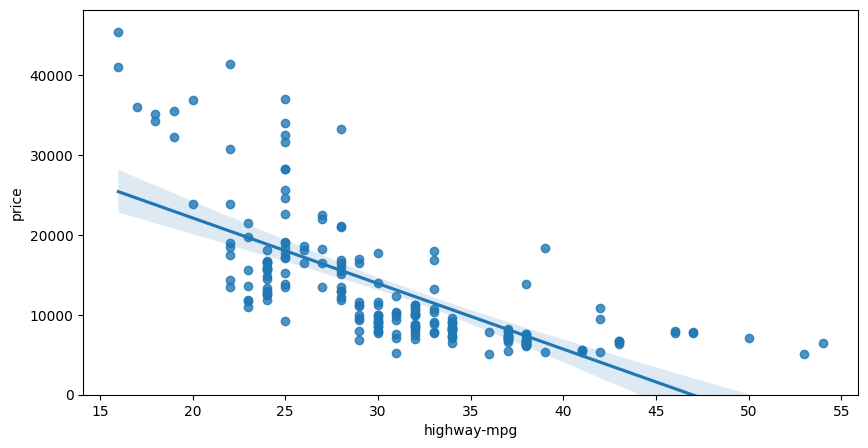

In [19]:
plt.figure(figsize=(10,5))
sns.regplot(x = df['highway-mpg'], y = df['price'])
plt.ylim(0,)
plt.savefig('charts/correlation_price_highway-mpg.png', dpi = 300,bbox_inches = 'tight')
plt.show()

In [21]:
# to calculate correlational coefficient and p value 
# from scipy stats.personr

pearson_coeff , p_value = sci.stats.pearsonr(df['horsepower'], df['price'])

print(f'correlational coefficient{pearson_coeff}') # 1 is positive linear relation, -1 negative linear relation
print(f'p_val;ue {p_value}') # p_value <.001 strong certainity in result, < .05 moderate, <.1 weak , >.1 no certinity in result

correlational coefficient0.8142054090366646
p_val;ue 7.932027833268933e-50


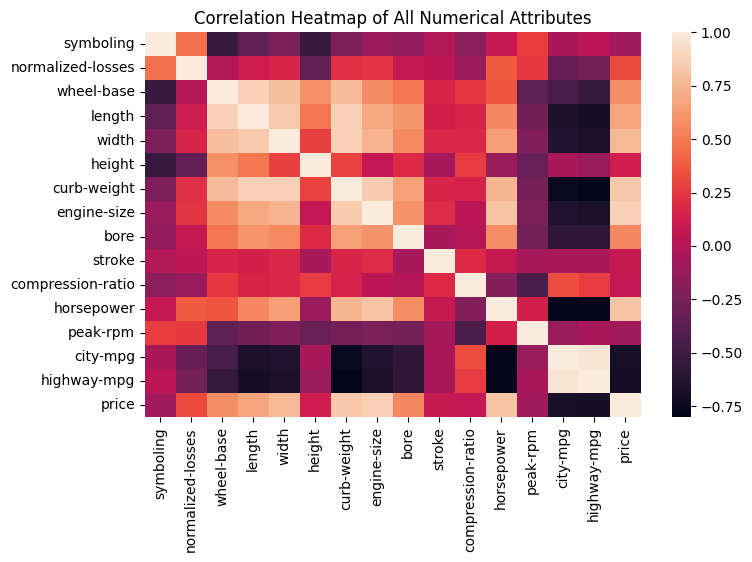

In [30]:
# 1. Select only numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# 2. Create correlation matrix
corr_matrix = df_numeric.corr()

# 3. Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=False, fmt='.2f')  # annot shows values
plt.title("Correlation Heatmap of All Numerical Attributes")
plt.savefig('charts/correlation_heatmap.png', dpi = 300, bbox_inches= 'tight')
plt.show()
